# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Irisデータセットを読み込む
iris = load_iris()

# 説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

# 目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

# データフレームの表示
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   target
0       0
1       0
2       0
3       0
4       0


1.2. `df_data` の行数と列数を表示しましょう。

In [4]:
# df_data の行数と列数を表示
print(f"行数: {df_data.shape[0]}")
print(f"列数: {df_data.shape[1]}")

行数: 150
列数: 4


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [5]:
# 各列の基本特徴量を表示
print(df_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.4. `df_data` に欠損値がないかを確認しましょう。

In [7]:
# df_data に欠損値がないかを確認
missing_values = df_data.isnull().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [3]:
# ランダムに10行を表示
random_sample = df_target.sample(n=10)
print(random_sample)

     target
116       2
44        0
3         0
1         0
119       2
20        0
93        1
113       2
109       2
140       2


### 問3. データの可視化（Extra）

3.1.x 軸を petal length (cm)、y  軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

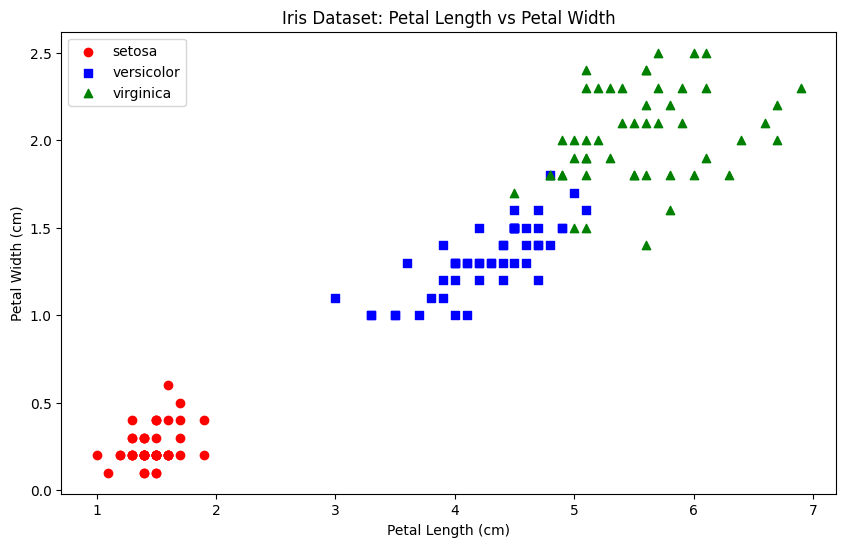

In [4]:
import matplotlib.pyplot as plt

# Irisデータセットを読み込む
iris = load_iris()

# 説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

# 目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

# 散布図の作成
plt.figure(figsize=(10, 6))

# setosa
setosa = df_data[df_target['target'] == 0]
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], color='red', marker='o', label='setosa')

# versicolor
versicolor = df_data[df_target['target'] == 1]
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], color='blue', marker='s', label='versicolor')

# virginica
virginica = df_data[df_target['target'] == 2]
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], color='green', marker='^', label='virginica')

# グラフのラベルとタイトル
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.legend()

# グラフの表示
plt.show()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Irisデータセットを読み込む
iris = load_iris()
data = iris.data
target = iris.target

# データを 4:1 に分割（80% を学習データ、20% をテストデータ）
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# RandomForestClassifier のインスタンスを生成
rf_model = RandomForestClassifier()

# x_train と y_train を用いてモデルを学習
rf_model.fit(x_train, y_train)

# モデルの学習が完了したことを確認
print("モデルの学習が完了しました。")

# テストデータを用いて予測
y_pred = rf_model.predict(x_test)

# モデルの精度を評価
accuracy = accuracy_score(y_test, y_pred)
print(f"モデルの精度: {accuracy:.2f}")

モデルの学習が完了しました。
モデルの精度: 1.00


4.2. 本当に4:1に分割できているか確認しましょう。

In [8]:
# データの分割が本当に4:1になっているか確認
train_size = len(x_train)
test_size = len(x_test)
total_size = train_size + test_size

print(f"学習データのサイズ: {train_size}")
print(f"テストデータのサイズ: {test_size}")
print(f"全データのサイズ: {total_size}")
print(f"学習データの割合: {train_size / total_size:.2f}")
print(f"テストデータの割合: {test_size / total_size:.2f}")

学習データのサイズ: 120
テストデータのサイズ: 30
全データのサイズ: 150
学習データの割合: 0.80
テストデータの割合: 0.20


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [5]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier のインスタンスを生成
rf_model = RandomForestClassifier()

# モデルの確認
print(rf_model)

RandomForestClassifier()


5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [9]:
# x_train と y_train を用いてモデルを学習
rf_model.fit(x_train, y_train)

# モデルの学習が完了したことを確認
print("モデルの学習が完了しました。")

モデルの学習が完了しました。


### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [10]:
# テストデータを用いて予測
y_pred = rf_model.predict(x_test)

# 予測結果を表示
print("予測結果:", y_pred)

予測結果: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [11]:
from sklearn.metrics import accuracy_score

# テストデータを用いて予測
y_pred = rf_model.predict(x_test)

# 予測結果と y_test に対して accuracy を計算
accuracy = accuracy_score(y_test, y_pred)

# モデルの精度を表示
print(f"モデルの精度: {accuracy:.2f}")

モデルの精度: 1.00


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。